### Data Preprocessing

For numerical features, we can look at the distributions, observe the skew and correct them with de-skewing methods. 

In [23]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [3]:
t(dim(numeric_df))
head(numeric_df)

1451,22


LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal
65,8450,2003,2003,196,706,0,150,856,856,⋯,1710,2003,548,0,61,0,0,0,0,0
80,9600,1976,1976,0,978,0,284,1262,1262,⋯,1262,1976,460,298,0,0,0,0,0,0
68,11250,2001,2002,162,486,0,434,920,920,⋯,1786,2001,608,0,42,0,0,0,0,0
60,9550,1915,1970,0,216,0,540,756,961,⋯,1717,1998,642,0,35,272,0,0,0,0
84,14260,2000,2000,350,655,0,490,1145,1145,⋯,2198,2000,836,192,84,0,0,0,0,0
85,14115,1993,1995,0,732,0,64,796,796,⋯,1362,1993,480,40,30,0,320,0,0,700


In [4]:
t(colnames(numeric_df))

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal


### Managing 0s: Numeric Features Processing

Here we are determining which numeric features contain zeros. For features that are predominately 0, we might consider turning that numeric feature into a categorical feature by either changing them to bools or by binning them.

#### $\geq \frac{2}{3}$ of values are 0s

`mostly_zeros` : If >=2/3 of the values are 0s, we will turn the feature into **booleans**.

#### $<\frac{2}{3}$ and $>\frac{1}{3}$ of the values are 0s

`some_zeros` : If between >1/3 and <2/3 of the values are 0s, we will **bin** that feature. 

The binning method we will use creates a bin for all 0 values, then determines to range by subtracting the `min` from the `max`. The range is then divided into 4 bins, which the rest of the values will be placed.

#### $\leq \frac{1}{3}$ of the values are 0s

`few_zeros` : If <=1/3 of the values are 0s, we will leave those features as **numeric** and perform de-skewing and scaling on that feature.


In [5]:
has_zeros <- function(dataframe){
    column_sums = colSums(dataframe == 0)
    return(t(column_sums))
}

has_zeros(numeric_df)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,0,0,860,464,1284,118,37,0,⋯,0,0,81,755,653,1244,1427,1335,1444,1399


In [6]:
get_mostly_zeros <- function(dataframe){
    mostly_zeros_df <- has_zeros(dataframe) >= (1451/3*2) 
    return(dataframe[,mostly_zeros_df])
}

get_some_zeros <- function(dataframe){
    some_zeros_df <- has_zeros(dataframe) > (1451/3) & has_zeros(dataframe) <(1451/3*2)
    return(dataframe[,some_zeros_df])
}

get_few_zeros <- function(dataframe){
    few_zeros_df <- has_zeros(dataframe) <= (1451/3) 
    return(dataframe[,few_zeros_df])
}

In [7]:
mostly_zeros <- get_mostly_zeros(numeric_df)
some_zeros <- get_some_zeros(numeric_df)
few_zeros <- get_few_zeros(numeric_df)

t(colnames(mostly_zeros))
t(colnames(some_zeros))
t(colnames(few_zeros))

BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal


MasVnrArea,SecondFlrSF,WoodDeckSF,OpenPorchSF


LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea


#### _Mostly Zeros_

In [8]:
turn_mostlyzeros_to_bool <- function(df){
    bool_feat <- df != 0
    return(bool_feat)
}

In [9]:
numeric_mostlyzero_df <- turn_mostlyzeros_to_bool(mostly_zeros)
head(numeric_mostlyzero_df)

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE


#### _Some Zeros_

In [10]:
find_binvals <- function(feature){
    temp_feat <- feature[feature !=0]
    maxval <- max(temp_feat)
    minval <- min(temp_feat)
    quart <- (maxval-minval)/4
    binvals <- c(-.0001,minval,minval+quart,minval+2*quart,maxval-quart,maxval)
    return(binvals)
}
    
bin_features <- function(feature){
    binvals <- find_binvals(feature)
    new_feat <- as.factor(.bincode(feature,binvals))
    levels(new_feat) <- c("0", "1st_bin","2nd_bin","3rd_bin","4th_bin")
    return(new_feat)
}

In [11]:
turn_somezeros_to_cat <-  function(df){
    cat_df <- apply(df, 2, bin_features)
    return(cat_df)
}   

In [12]:
numeric_somezeros_df <- turn_somezeros_to_cat(some_zeros)
head(numeric_somezeros_df)

MasVnrArea,SecondFlrSF,WoodDeckSF,OpenPorchSF
1st_bin,2nd_bin,0,1st_bin
0,0,2nd_bin,0
1st_bin,2nd_bin,0,1st_bin
0,2nd_bin,0,1st_bin
1st_bin,2nd_bin,1st_bin,1st_bin
0,1st_bin,1st_bin,1st_bin


#### _Few Zeros_
#### Deskewing and Scaling

Now that we have our `few_zeros` which consists of the remaining numeric features, we can continue our data preparation by deskewing and scaling.

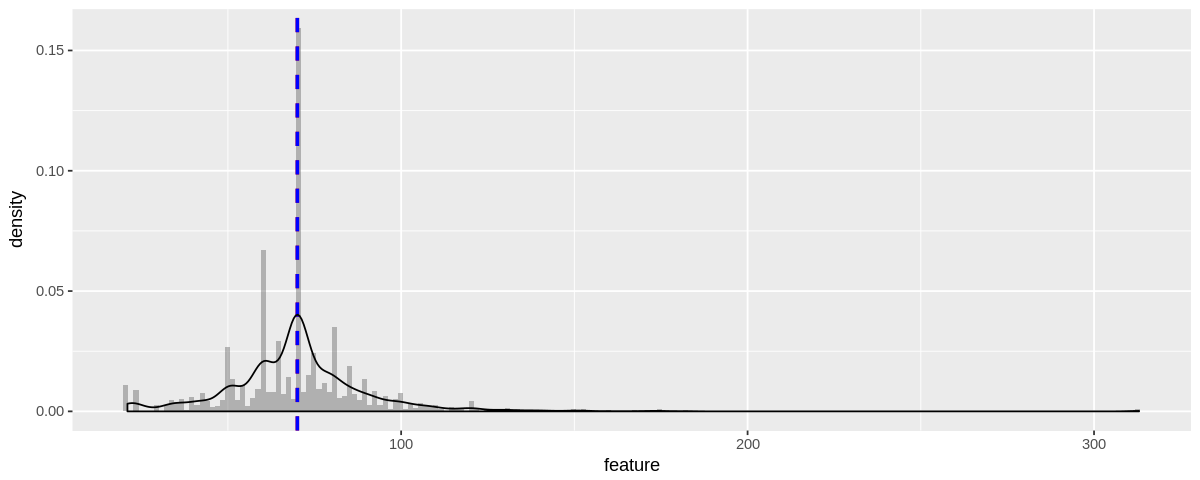

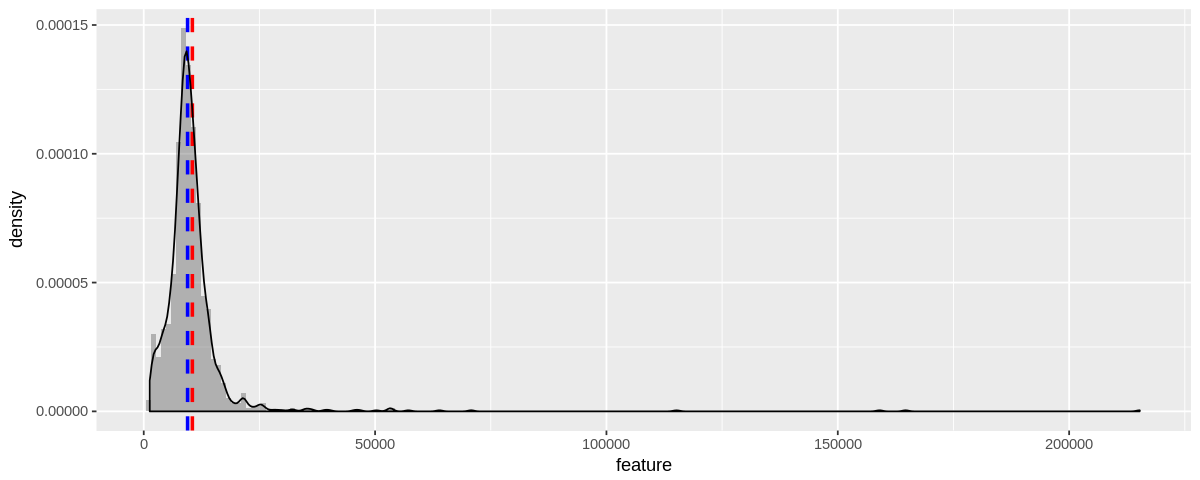

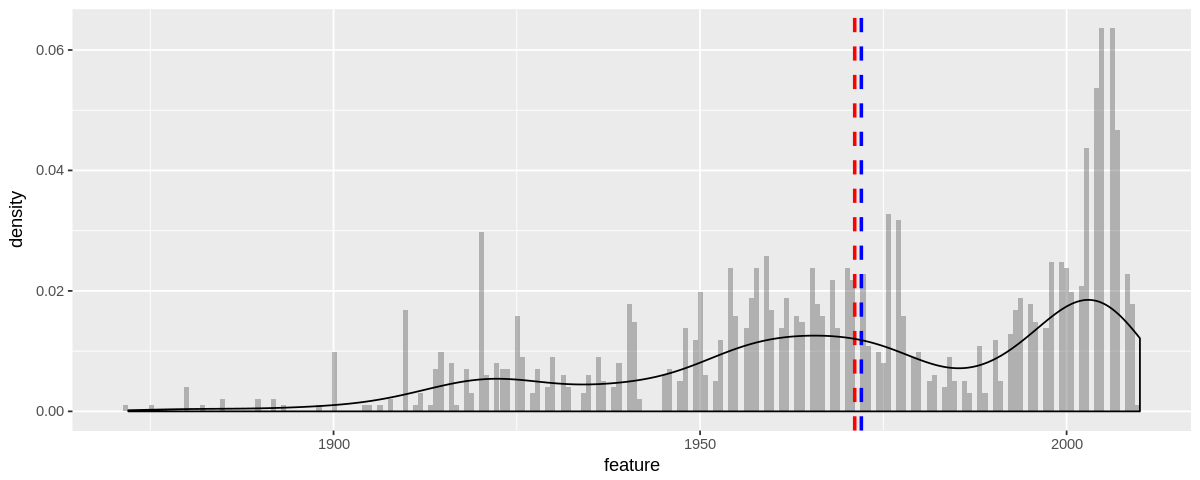

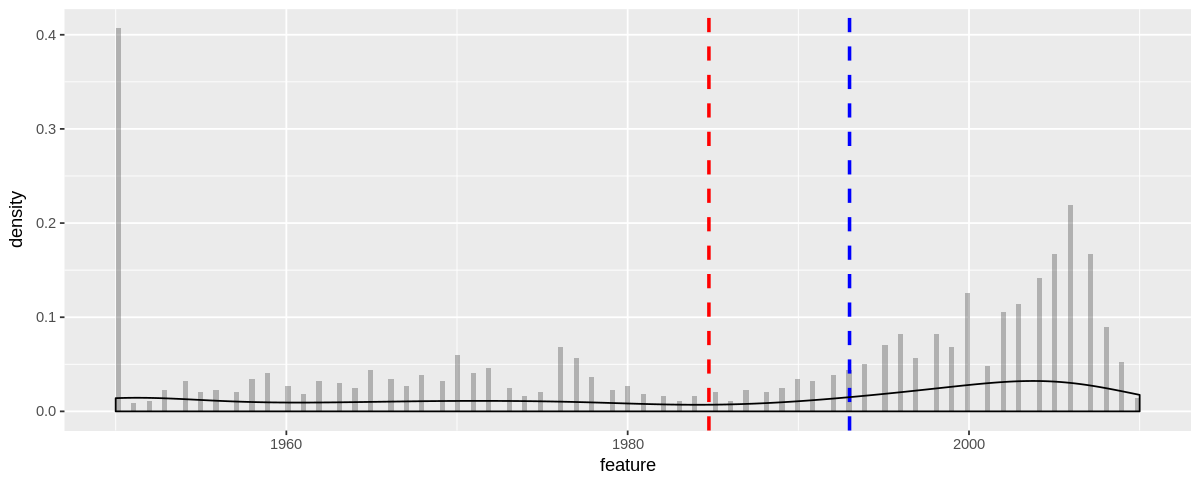

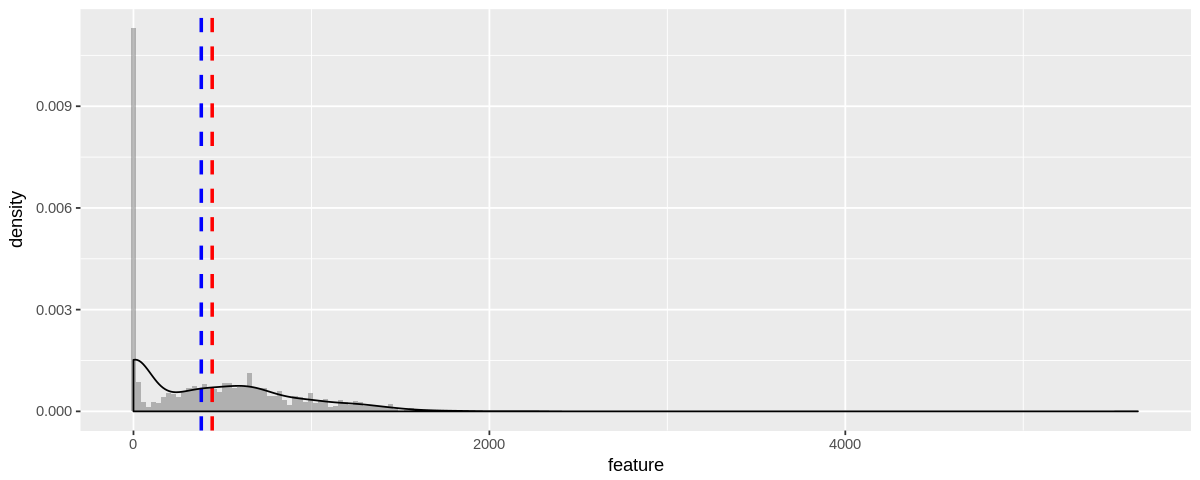

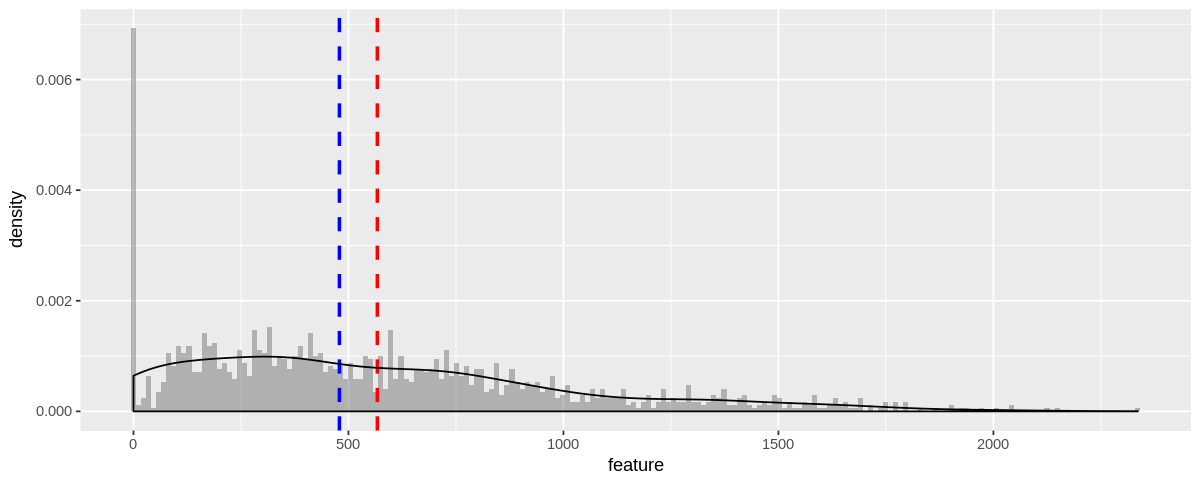

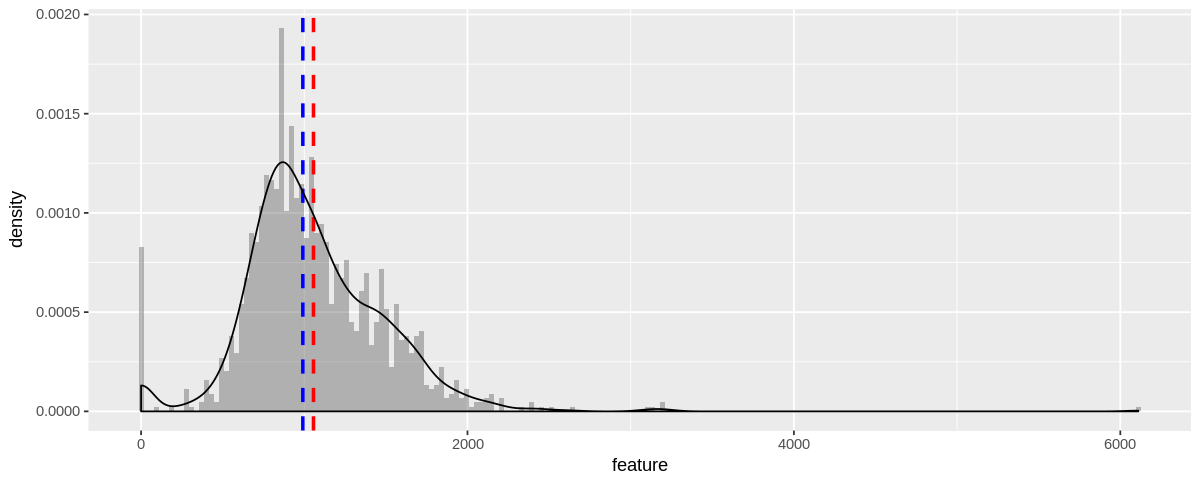

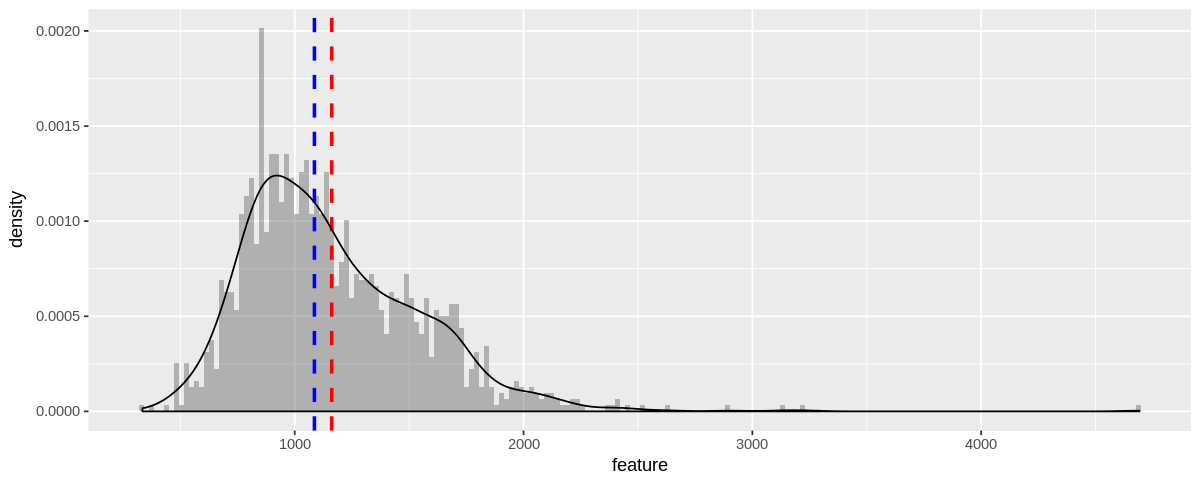

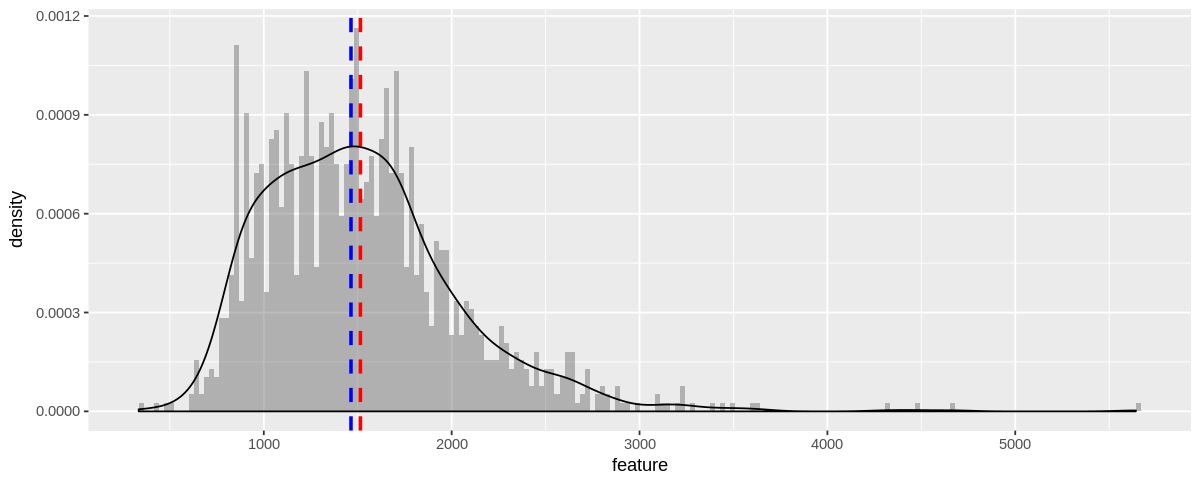

$LotFrontage

$LotArea

$YearBuilt

$YearRemodAdd

$BsmtFinSF1

$BsmtUnfSF

$TotalBsmtSF

$FirstFlrSF

$GrLivArea

$GarageYrBlt

$GarageArea


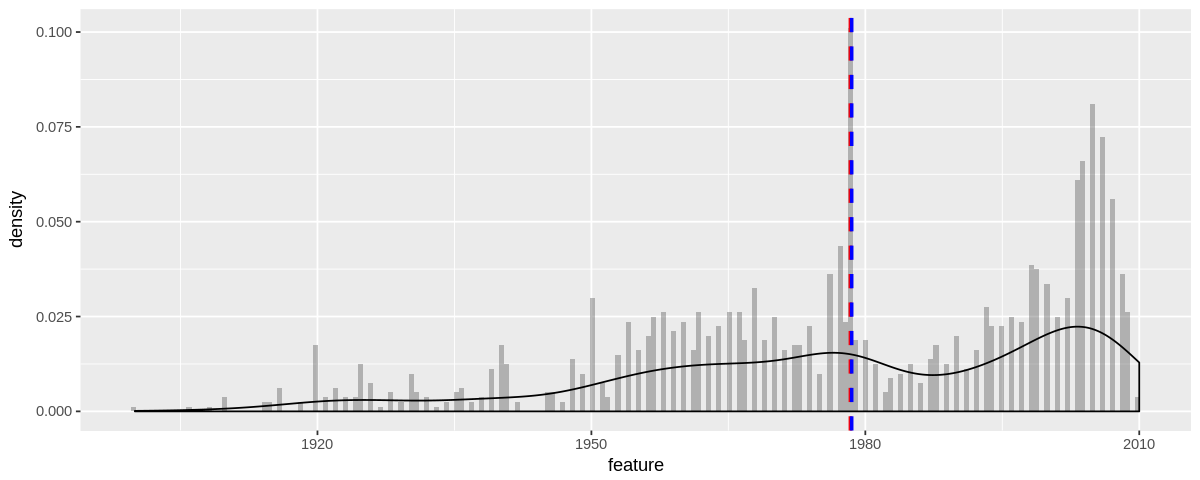

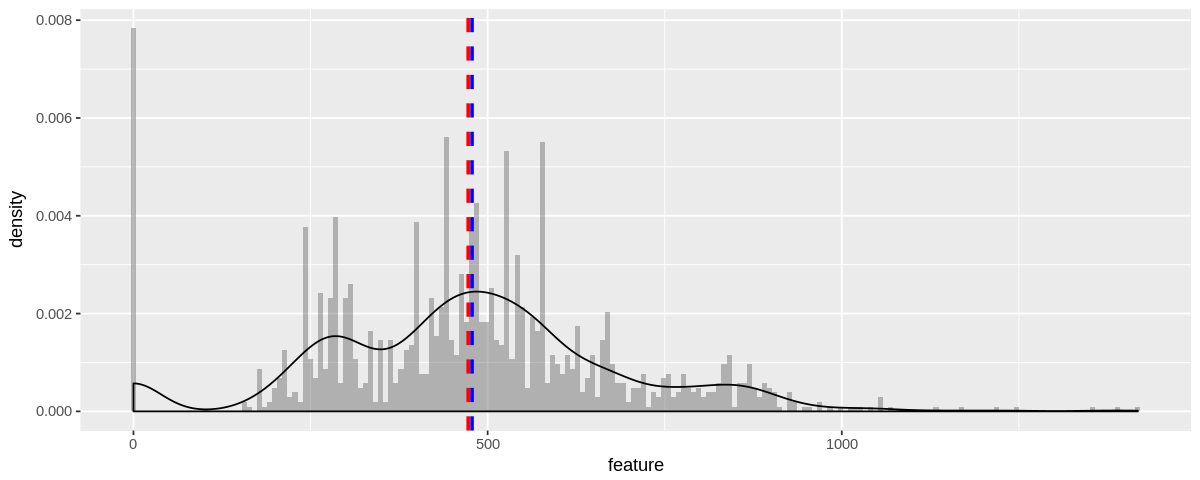

In [24]:
apply(few_zeros, 2, hist_with_kde)

In [14]:
summary_fewzeros <- describe(few_zeros)
summary_fewzeros$trimmed <- NULL
summary_fewzeros$mad <- NULL
summary_fewzeros$vars <- NULL
summary_fewzeros$n <- NULL
summary_fewzeros

,mean,sd,median,min,max,range,skew,kurtosis,se
LotFrontage,70.03159,22.04094,70.04996,21,313,292,2.3903289,21.8094801,0.5786239
LotArea,10507.80841,9992.98708,9477.00000,1300,215245,213945,12.2104555,202.5954151,262.3382516
YearBuilt,1971.09235,30.19027,1972.00000,1872,2010,138,-0.6069638,-0.4485022,0.7925620
YearRemodAdd,1984.76017,20.65133,1993.00000,1950,2010,60,-0.4953132,-1.2816099,0.5421437
BsmtFinSF1,442.27498,455.36928,381.00000,0,5644,5644,1.6990636,11.2310484,11.9544615
BsmtUnfSF,567.19711,442.20919,479.00000,0,2336,2336,0.9180755,0.4645708,11.6089799
TotalBsmtSF,1056.31013,437.91461,991.00000,0,6110,6110,1.5323929,13.3711172,11.4962375
FirstFlrSF,1161.55134,385.00253,1086.00000,334,4692,4358,1.3703038,5.7961874,10.1071772
GrLivArea,1514.17436,525.79952,1464.00000,334,5642,5308,1.3706739,4.8954465,13.8034129
GarageYrBlt,1978.36182,23.98642,1978.50616,1900,2010,110,-0.6612688,-0.2776183,0.6296970


In [15]:
fewzeros_lg_df <- log(few_zeros+0.000001)
fewzeros_lg_sc_df<- scale(fewzeros_lg_df)

head(few_zeros, 3)
head(fewzeros_lg_df, 3)
head(fewzeros_lg_sc_df, 3)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
65,8450,2003,2003,706,150,856,856,1710,2003,548
80,9600,1976,1976,978,284,1262,1262,1262,1976,460
68,11250,2001,2002,486,434,920,920,1786,2001,608


LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
4.174387,9.041922,7.602401,7.602401,6.559615,5.010635,6.752270,6.752270,7.444249,7.602401,6.306275
4.382027,9.169518,7.588830,7.588830,6.885510,5.648974,7.140453,7.140453,7.140453,7.588830,6.131226
4.219508,9.328123,7.601402,7.601902,6.186209,6.073045,6.824374,6.824374,7.487734,7.601402,6.410175


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
1,-0.08309725,-0.1316206,1.0509849,0.8820760,0.7205018,0.08917398,0.1084214,-0.8026317,0.5315369,1.02265460,0.2771098
2,0.56397645,0.1149991,0.1692304,-0.4188065,0.7552734,0.20492237,0.2264173,0.4214040,-0.3785471,-0.09204807,0.2390487
3,0.05751312,0.4215520,0.9860786,0.8342087,0.6806608,0.28181796,0.1303386,-0.5752722,0.6618057,0.94060083,0.2997008


In [16]:
numeric_fewzeros_df <- fewzeros_lg_sc_df #renaming

In [17]:
numeric_updated_df <- data.frame(numeric_mostlyzero_df,numeric_somezeros_df,numeric_fewzeros_df)

In [21]:
head(numeric_updated_df)

BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MasVnrArea,SecondFlrSF,WoodDeckSF,⋯,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,0,⋯,-0.1316206,1.0509849,0.8820760,0.7205018,0.08917398,0.10842138,-0.8026317,0.5315369,1.02265460,0.2771098
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,2nd_bin,⋯,0.1149991,0.1692304,-0.4188065,0.7552734,0.20492237,0.22641726,0.4214040,-0.3785471,-0.09204807,0.2390487
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,0,⋯,0.4215520,0.9860786,0.8342087,0.6806608,0.28181796,0.13033862,-0.5752722,0.6618057,0.94060083,0.2997008
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,0,2nd_bin,0,⋯,0.1049061,-1.8680714,-0.7103048,0.5941378,0.32144248,0.07065950,-0.4377884,0.5437750,0.81736628,0.3115320
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,1st_bin,⋯,0.8798018,0.9536011,0.7384023,0.7125017,0.30382402,0.19684307,0.1146148,1.2836237,0.89954319,0.3689426
FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,0,1st_bin,1st_bin,⋯,0.8600478,0.7258029,0.4984665,0.7243605,-0.06527209,0.08633152,-1.0317819,-0.1501048,0.61156359,0.2483025


In [19]:
write.csv(numeric_updated_df, 'numeric_updated_df')